In [24]:
import wandb
import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import pandas as pd
import pathlib
import time


In "Validation of synthetic data" the case were the training_data was completely confounded was tested to show that neural networks indeed fit to confounding factors in images. Now the hypothesis is that if we have a small set of unconfounded data we can either use a confounder-free neural network or a DANN to unlearn the confounders. For establishing a performance baseline we need to test the SimpleConv on a dataset consisting of the confounded set and the small unconfounded set, otherwise the conditions would not be equal for the different networks.

In this case there are 512 samples from the source domain (with correlating confounders) and a varying number of samples (16 or 64) from the target domain (with no confounders).

In [25]:
#CI.sync_wandb_data("BrNet on br_net data")

Syncing took 37.410704612731934 seconds


In [26]:
# define filename
dir = pathlib.Path().resolve()
file = dir / "BrNet on br_net data.json"

# create plot-object for later use
p = CI.plot_from_csv()
# get newest date
#date = "2022.7.19 14:11:9"
date = CI.get_dates(file)[0]
#date = "2022.8.2 10:15:26"
print(date)

2022.8.3 17:26:9


# No confounders in target and test_data

### With 16 training-samples from target population

The accuracy with more samples is the same but the network converges faster.

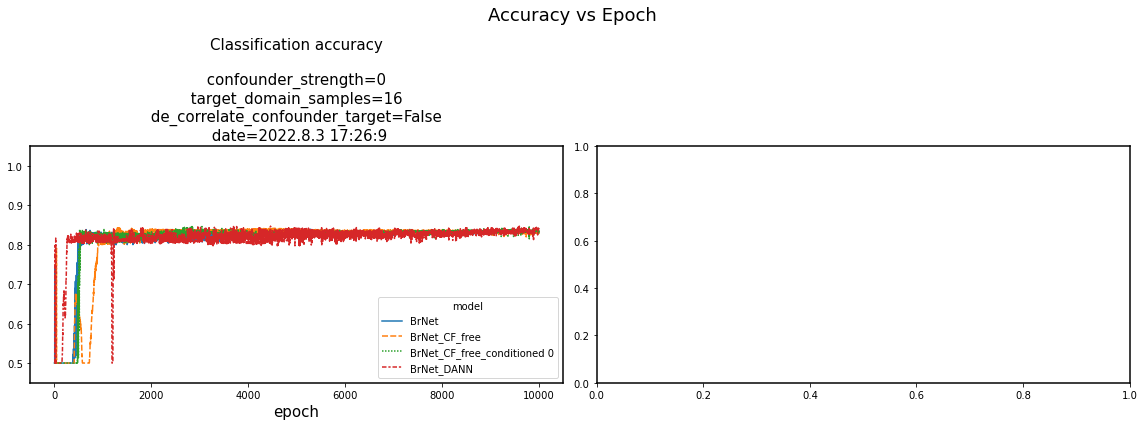

In [27]:
config_filter = {"confounder_strength":0, "target_domain_samples":16, "de_correlate_confounder_target": False, "date": date}
p.accuracy_vs_epoch(file, config_filter, groupby="model")

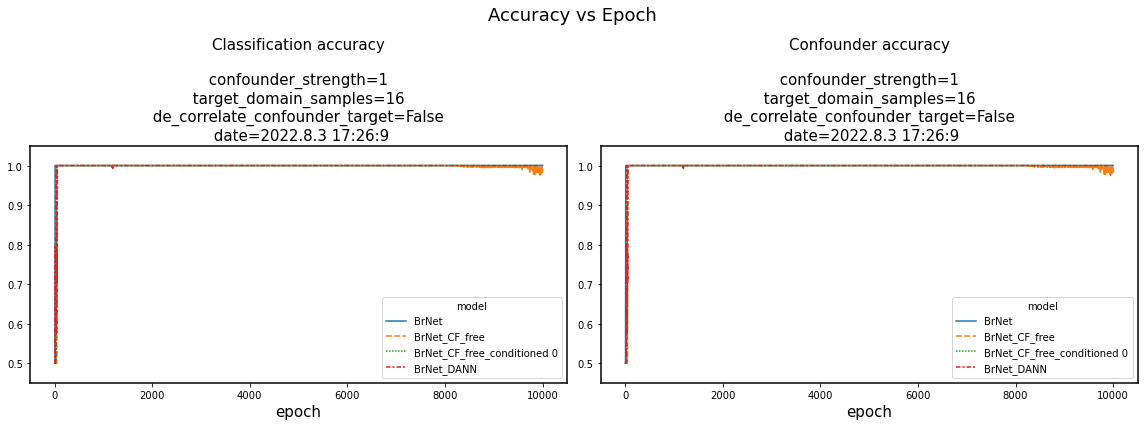

In [28]:
config_filter = {"confounder_strength":1, "target_domain_samples":16, "de_correlate_confounder_target": False, "date": date}
p.accuracy_vs_epoch(file, config_filter, groupby="model")

# De-correlated confounders in target- and test-data

### With 0 training-samples from target population


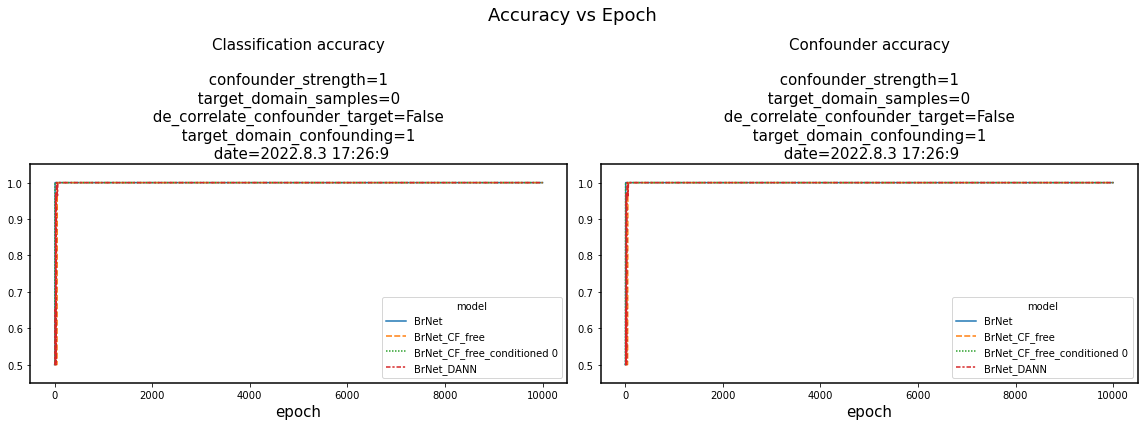

In [29]:
config_filter = {"confounder_strength":1, "target_domain_samples":0, "de_correlate_confounder_target": False, "target_domain_confounding":1, "date": date}
p.accuracy_vs_epoch(file, config_filter, groupby="model")

### With 16 training-samples from target population

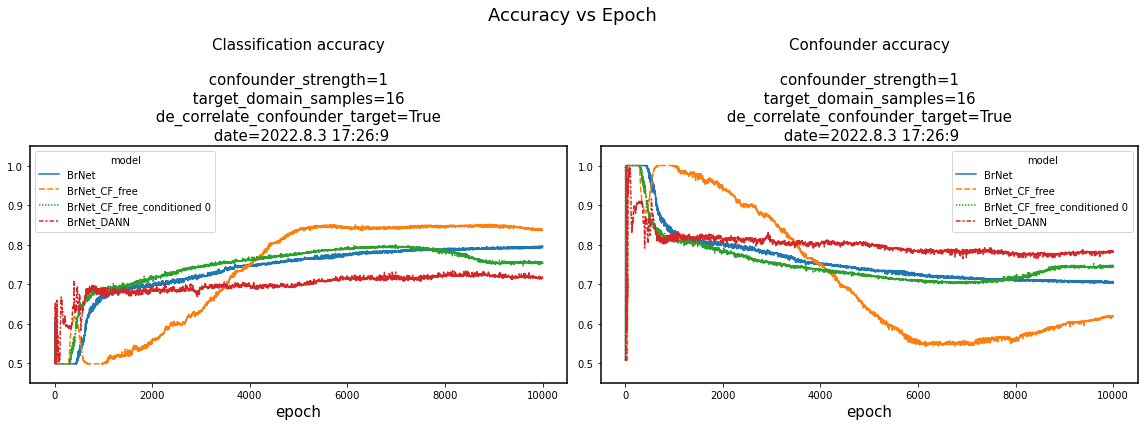

In [30]:
config_filter = {"confounder_strength":1, "target_domain_samples":16, "de_correlate_confounder_target": True, "date": date}
p.accuracy_vs_epoch(file, config_filter, groupby="model")

### With 128 training-samples from target population

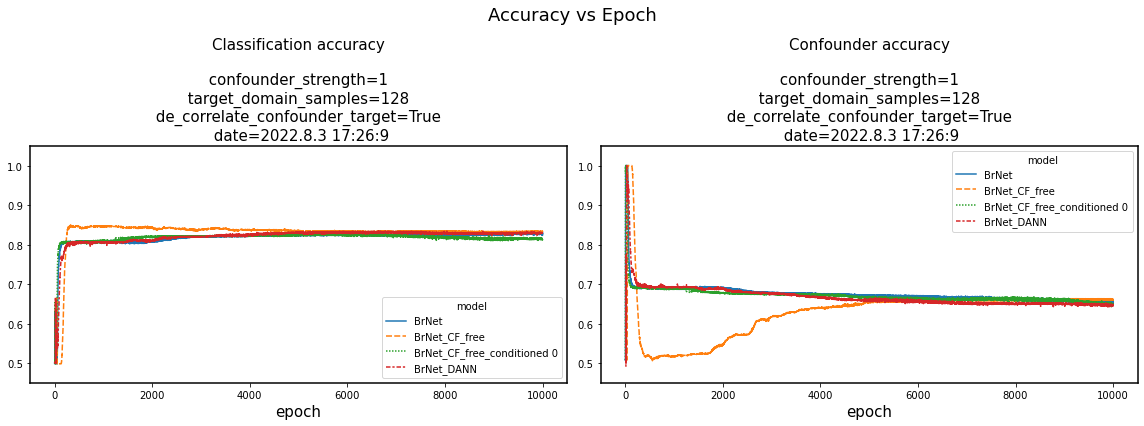

In [31]:
config_filter = {"confounder_strength":1, "target_domain_samples":128, "de_correlate_confounder_target": True, "date": date}
p.accuracy_vs_epoch(file, config_filter, groupby="model")

In [32]:
#c.show_time()